In [1]:
import pandas as pd
mutations = pd.read_csv('./mutations.txt',sep='\t')

In [ ]:
mutations.to_csv('./MutationData/Pan cancer.csv',index=False)

In [2]:
for tumor_t in set(mutations['Tumor_Type']):
    if len(set(mutations.loc[mutations['Tumor_Type']==tumor_t]['Tumor_Sample']))>100:
        mutations.loc[mutations['Tumor_Type']==tumor_t].to_csv('./MutationData/'+tumor_t+'_mutations.csv',index=False)
        print(tumor_t, len(set(mutations.loc[mutations['Tumor_Type']==tumor_t]['Tumor_Sample'])),
              len(set(mutations.loc[mutations['Tumor_Type']==tumor_t]['Gene'])),
              len(mutations.loc[mutations['Tumor_Type']==tumor_t].index),
              len({mutations.loc[x,'Chromosome']+'_'+str(mutations.loc[x,'Start_Position'])
               for x in mutations.index
                   if mutations.loc[x,'Reference_Allele']!='Nonsense_Mutation'
                   and mutations.loc[x,'Tumor_Type']==tumor_t}))

Neuroblastoma 351 3865 6452 5039
LAML 196 3070 4179 4023
Melanoma 289 15405 97805 94570
Breast Adenocarcinoma 1093 15024 55614 54803
Thyroid Carcinoma 325 4548 6423 6093
Lung Adenocarcinoma 394 16041 106613 105715
Prostate Adenocarcinoma 420 8964 16783 16602
Glioblastoma Multiforme 365 9597 21922 21571
CLL 223 2687 3490 3452
Esophageal Adenocarcinoma 160 8762 19140 18862
Medulloblastoma 331 2735 3615 3471
Stomach Adenocarcinoma 244 13085 42455 42018
Kidney Papillary Cell Carcinoma 111 5318 7540 7511
Colorectal 244 11996 32191 31413
MM 205 6613 10781 10635
Liver Hepatocellular carcinoma 150 5212 7646 7608
Head and Neck Squamous Cell Carcinoma 407 14710 60073 59244
Kidney Clear Cell Carcinoma 484 11723 28483 28127
Low Grade Glioma 227 6041 9965 9591
Bladder Urothelial Carcinoma 142 12423 33771 33550
Ovarian 480 11545 28135 27887
Pancreatic Adenocarcinoma 233 5167 7938 7664
Endometrial Carcinoma 255 13315 39233 38664
Lung Squamous Cell Carcinoma 175 13875 53527 53286


In [28]:
for vc in set(mutations['Variant_Classification'].values):
    print(vc,len(mutations.loc[mutations['Variant_Classification']==vc]))

Silent 177737
upstream 3
downstream 5
Missense_Mutation 465597
Promoter 3004
Translation_Start_Site 497
upstream;downstream 1
Splice_Site 24459
Start_Codon_Del 1
Splice_Region 132
NCSD 29
Nonstop_Mutation 276
miRNA 22
De_novo_Start_InFrame 16
De_novo_Start 2
Read-through 1
Frame_Shift_Indel 18691
In_Frame_Indel 4456
De_novo_Start_OutOfFrame 82
Nonsense_Mutation 34194


In [2]:
Tumor_gene = pd.DataFrame(0,index=list(set(mutations['Gene'].values)),columns=list(set(mutations['Tumor_Type'].values)))
for tumor_t in set(mutations['Tumor_Type']):
    temp = mutations.loc[mutations['Tumor_Type']==tumor_t]
    genes = list(temp['Gene'].values)
    for g in set(genes):
        Tumor_gene.loc[g,tumor_t] = genes.count(g)
    print(tumor_t)

In [3]:
Tumor_gene.to_csv('./MutationData/Tumor_gene_count.csv')

In [2]:
tumors = set()
for tumor_t in set(mutations['Tumor_Type']):
    if len(set(mutations.loc[mutations['Tumor_Type']==tumor_t]['Tumor_Sample']))>100:
        tumors.add(tumor_t)

In [4]:
samples = list(set(mutations['Tumor_Sample'].values))
samples_type = dict()

In [5]:
mutcount = {s:0 for s in samples}
for i in mutations.index:
    samples_type[mutations.loc[i,'Tumor_Sample']] = mutations.loc[i,'Tumor_Type']
    mutcount[mutations.loc[i,'Tumor_Sample']] += 1
    if mutations.loc[i,'Tumor_Type'] not in tumors:
        samples_type[mutations.loc[i,'Tumor_Sample']] = 'other'
samples = list(samples_type.keys())
sampleinfo=pd.DataFrame({'sample':samples,
                         'Type':[samples_type[s] for s in samples],
                         'MutNum':[mutcount[s] for s in samples]})
sampleinfo.to_csv('./MutationData/Sample_info.csv',index=False)

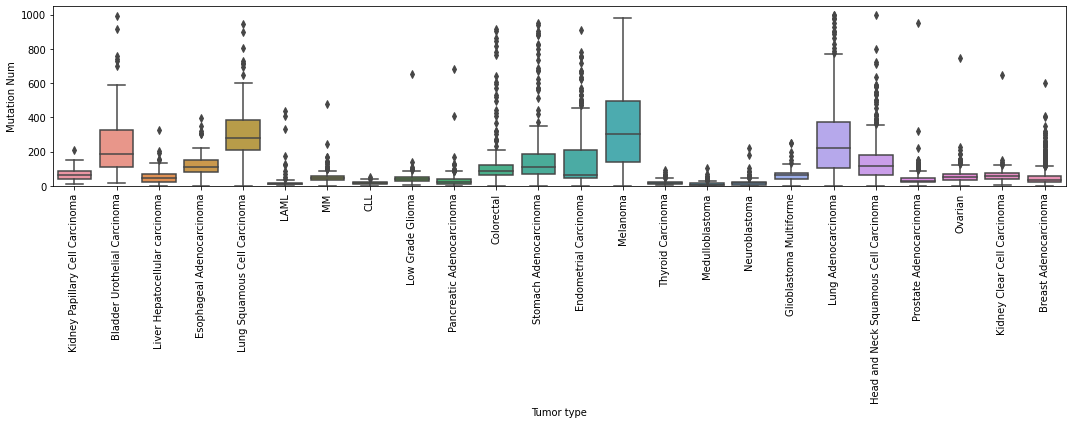

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
tumorslist = list(tumors)
tumorslist.sort(key=lambda x:list(sampleinfo['Type'].values).count(x))
plt.figure(figsize=(15,6))
sns.boxplot(data = sampleinfo,x='Type',y='MutNum',order=tumorslist)
plt.xticks(rotation=90)
plt.ylim(ymin=0)
plt.ylabel('Mutation Num')
plt.xlabel('Tumor type')
plt.tight_layout()
plt.savefig('./Mutation num per sample.pdf')

In [25]:
tumorcount = pd.DataFrame({'Tumor type':tumorslist,
                           'Sample Num':[list(sampleinfo['Type'].values).count(x) for x in tumorslist]})

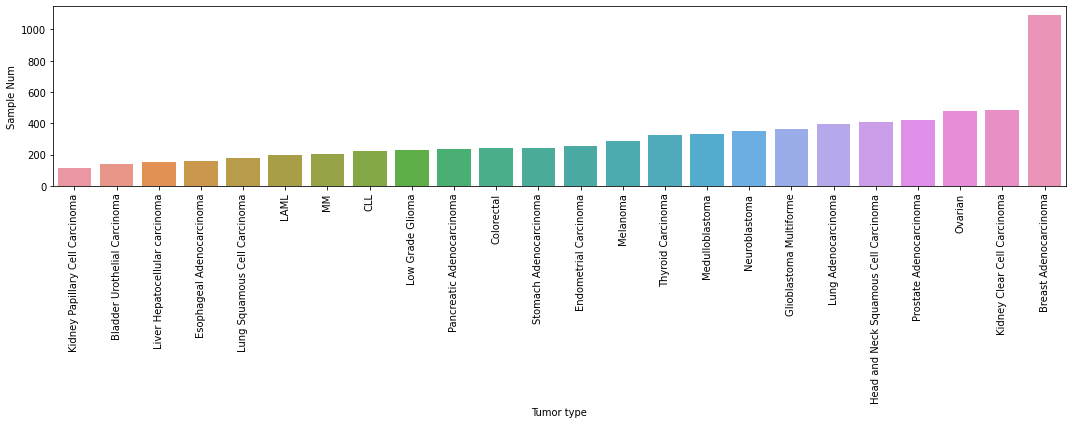

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(data = tumorcount,x='Tumor type',y='Sample Num',order=tumorslist)
plt.xticks(rotation=90)
plt.ylim(ymin=0)
plt.tight_layout()
plt.savefig('./Sample num.pdf')